In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [16]:
X = pd.read_csv('X_sm_allfeatures.csv', index_col=False)
X = X.drop(columns=['internalTaxonId', 'Unnamed: 0'])
y = pd.read_csv('y_sm_allfeatures.csv', index_col=False)
y = y[["redlistCategory"]]


print("X shape: ", X.shape, "y shape: ", y.shape)

X shape:  (186599, 13) y shape:  (186599, 1)


In [17]:
X=(X-X.mean())/X.std()
#X=(X-X.min())/(X.max()-X.min())
X.head()

,systems,realm,populationTrend,phylumName,className,orderName,familyName,genusName,habitat_name,country_name,threat_name,stressName,usetrade_name
0,-0.168161,-0.683408,-1.269617,-0.095492,-0.883692,-1.168874,-1.217522,-1.249871,-0.767565,-1.336172,-1.222577,-0.491244,0.270604
1,-0.168161,-0.618621,-1.269617,-0.095492,-0.249589,-1.107216,-1.204002,-1.249202,-0.699127,-1.321518,-1.169786,-0.463287,0.793247
2,-0.168161,-0.553833,0.347511,-0.095492,-0.249589,-1.107216,-1.204002,-1.248533,-0.699127,-1.306864,-1.064205,-0.407372,0.793247
3,-0.168161,-0.553833,-1.269617,-0.095492,-0.249589,-1.107216,-1.204002,-1.247865,-0.630689,-1.292210,-0.905834,-0.351457,-0.513361
4,-0.168161,-0.618621,-1.269617,-0.095492,-0.249589,-1.107216,-1.204002,-1.247196,-0.562251,-1.321518,-1.116996,-0.351457,0.793247


In [18]:
y.head()

,redlistCategory
0,3
1,3
2,3
3,4
4,3


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [20]:
y_test.head()

,redlistCategory
171643,6
116827,4
79927,2
45323,3
77422,2


In [21]:
#set random seed
tf.random.set_seed(42)
#create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(7,activation="softmax")
])
#compile the model
model_12.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20) )
num_epochs = 15
#fit the model
fit_lr_history =model_12.fit(
   X_train,
   y_train,
   epochs=num_epochs,
   callbacks=[lr_scheduler],
   validation_data=(X_test,y_test),
   verbose=1)

Epoch 1/15
3907/3907 [==============================] - 9s 2ms/step - loss: 1.2385 - accuracy: 0.4870 - val_loss: 1.0785 - val_accuracy: 0.5480 - lr: 0.0010
Epoch 2/15
3907/3907 [==============================] - 9s 2ms/step - loss: 1.0699 - accuracy: 0.5512 - val_loss: 1.0241 - val_accuracy: 0.5665 - lr: 0.0011
Epoch 3/15
3907/3907 [==============================] - 8s 2ms/step - loss: 1.0311 - accuracy: 0.5657 - val_loss: 1.0067 - val_accuracy: 0.5727 - lr: 0.0013
Epoch 4/15
3907/3907 [==============================] - 8s 2ms/step - loss: 1.0055 - accuracy: 0.5758 - val_loss: 0.9964 - val_accuracy: 0.5804 - lr: 0.0014
Epoch 5/15
3907/3907 [==============================] - 9s 2ms/step - loss: 0.9914 - accuracy: 0.5819 - val_loss: 0.9724 - val_accuracy: 0.5901 - lr: 0.0016
Epoch 6/15
3907/3907 [==============================] - 9s 2ms/step - loss: 0.9840 - accuracy: 0.5859 - val_loss: 0.9579 - val_accuracy: 0.5945 - lr: 0.0018
Epoch 7/15
3907/3907 [==============================] - 9s

In [22]:
a = model_12.evaluate(X_test,y_test)

1925/1925 [==============================] - 3s 1ms/step - loss: 0.9883 - accuracy: 0.5792


In [23]:
y_pred = model_12.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


1925/1925 [==============================] - 2s 1ms/step


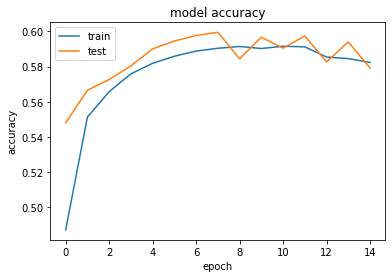

In [24]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

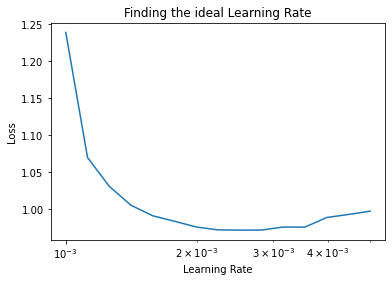

In [25]:
import matplotlib.pyplot as plt

lrs =1e-3 *(10**(tf.range(num_epochs)/20))
plt.semilogx(lrs,fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

[[6089 1558  475  348  130   39  109]
 [ 284 5155 1268 1439  318  124  278]
 [ 173 3261 2239 2075  525  143  352]
 [  55 3086 1119 3388  811   72  218]
 [  52 2572  850 3277 1598  120  228]
 [   0   17    0    0    0 8964    1]
 [  31   78  261    0   33  129 8236]]


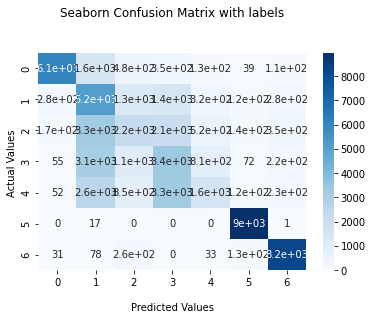

In [26]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
#y_pred
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

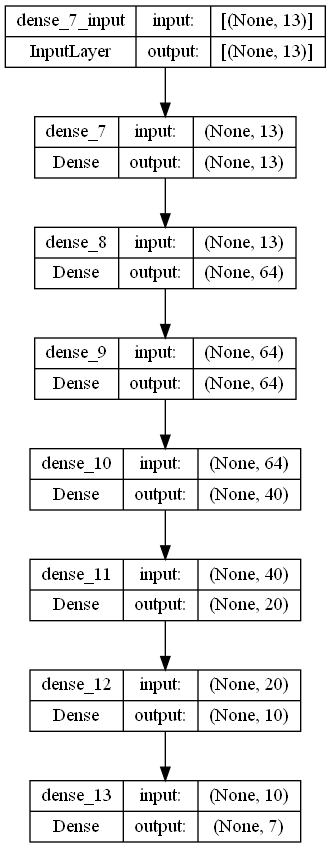

In [27]:
from tensorflow.keras.utils import plot_model
#see the inputs and outputs
plot_model(model_12,show_shapes=True)